In [1]:
# Librerias requeridas
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd


In [2]:
# Importamos los datos preprocesados
df_final = joblib.load('Salidas\\df_final.pkl')
pd.options.display.max_columns = None

In [3]:
df_final

,MES_x,Tipo,NRODOC,Peso,Talla,ClasificaciÃ³n IMC,SaturaciÃ³n de OxÃ­geno (%),PerÃ­metro Muslo,PerÃ­metro Cintura,Pliegue Triceps,Pliegue Abdomen,Pliegue Muslo,Sumatoria Pliegues,PresiÃ³n Arterial SistÃ³lica,PresiÃ³n Arterial DiastÃ³lica,Frecuencia CardÃ­aca en reposo,Auto-calificacion Nivel de Ejercicio,Constantes,METS -Ãndice MetabÃ³lico,VO2 - MÃ¡xima Cantidad de OxÃ­geno,Ãndice de Fragilidad Groningen,CalificaciÃ³n (Ãndice de Fragilidad),Tiempo en Segundos (Apoyo Monopodal),CalificaciÃ³n (Apoyo Monopodal),Tiempo en Segundos (Recorrer 5 metros),CalificaciÃ³n Velocidad,Diabetes Mellitus,Glicemia,Hemoglobina Glicada,Control Diabetes,Tiene HTA,Tiene EPOC,Enfermedad Coronaria (En el Ãºltimo aÃ±o),Insuficiencia CardÃ­aca,ValvulopatÃ­a,Arritmia o paciente con dispositivo,Sufre de alguna enfermedad cardiovascular,Tabaquismo,Lipoproteina,HDL,Colesterol total,Trigliceridos,Creatinina 1 consulta,Tasa de FiltraciÃ³n Glomerular TFG,Estadio de la Enfermedad Renal,Microalbuminuria,Hormona Estimulante de la Tiroides (TSH),Clase Funcional,Creatinina 2 consulta,Tasa de FiltraciÃ³n Glomerular TFG2,Meses de diferencia entre TFG,Cambio de TFG,Ãlcera de pie diabÃ©tico,RemisiÃ³n,DiagnÃ³stico Principal,Diagnostico,SEXO,DEPARTAMENTO,MUNICIPIO,BARRIO,PRIMERA CLASE FUNCIONAL,ÚLTIMA CLASE FUNCIONAL,EDAD_2,MES_y,NRO ATENCION,NRO INGRESO,SERVICIO HABILITADO COD,SERVICIO HABILITADO,TIPO IDENTIFICACION,FECHA NACIMIENTO,REGIMEN AFILIACION,FUENTE FINANCIACION2,SERVICIO ADMITE,BLOQUE ANTERIOR,PISO ANTERIOR,SERVICIO ANTERIOR,NRO CAMA ANTERIOR,VIA INGRESO,BLOQUE,UNIDAD ESTRATEGICA,PISO,NRO CAMA,SERVICIO EGRESO,TIPO EGRESO,FECHA INGRESO CLINICA,FECHA SALIDA,DEMORA ASIGNACION CAMA,DEMORA APLICACION MEDICAMENTO,TRANSFUSION SANGRE,ANTIBIOTICO,DXPRINCIPAL EGRESO COD,DXPRINCIPAL EGRESO,DX RELACIONADO1 COD,DX RELACIONADO1,DX RELACIONADO2 COD,DX RELACIONADO2,DX RELACIONADO3 COD,DX RELACIONADO3,DX PRINCIPAL EGRESO CATEGORIA COD,DX PRINCIPAL EGRESO CATEGORIA,DX PRINCIPAL EGRESO CAPITULO COD,DX PRINCIPAL EGRESO CAPITULO,PROFESIONAL ESPECIALIDAD,PROFESIONAL ESPECIALIDAD GRD
0,OCTUBRE,CC,308418,62.0,155.0,Sobrepeso,94.0,60,89.0,25.0,35.0,20.0,80.0,181,143,90,2,0.32,4.1023,14.3580,6.0,FrÃ¡gil,1,Malo - Fragil,7,Deficiente,No,98.0,0.00,No aplica,Si,Si,No aplica,No aplica,No,No,No,No,92.0,45.0,157.0,103.0,0.85,58.56,Estadio 3A,0.0,4.65,Clase funcional 2A,0.00,0.00,0.0,0.00,No,Grupal 2,I10X - HIPERTENSION ESENCIAL (PRIMARIA),Hipertensión,F,NaN,NaN,NaN,NaN,NaN,77.0,MARZO,3969648,2211723,101.0,General adultos,CC,1945-06-27 00:00:00.000,Contributivo,NUEVA EPS,Urgencias Generales Sótano,Bloque 3,Urgencias,Camillas Sala 5 Urgencias,503,Urgencias,Bloque 1,Hospitalizacion Adultos,Piso 9,911BS,Piso 9 Medicina Interna Sur,Alta Médica,2018-03-20 20:34:12.150,2018-03-26 14:01:02.000,30:44,-127:36,NO,NO,J441,ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EX...,J980,ENFERMEDADES DE LA TRAQUEA Y DE LOS BRONQUIOS ...,I10X,HIPERTENSION ESENCIAL (PRIMARIA),I828,EMBOLIA Y TROMBOSIS DE OTRAS VENAS ESPECIFICADAS,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,Medicina Interna,Medicina Interna
1,OCTUBRE,CC,308418,62.0,155.0,Sobrepeso,94.0,60,89.0,25.0,35.0,20.0,80.0,181,143,90,2,0.32,4.1023,14.3580,6.0,FrÃ¡gil,1,Malo - Fragil,7,Deficiente,No,98.0,0.00,No aplica,Si,Si,No aplica,No aplica,No,No,No,No,92.0,45.0,157.0,103.0,0.85,58.56,Estadio 3A,0.0,4.65,Clase funcional 2A,0.00,0.00,0.0,0.00,No,Grupal 2,I10X - HIPERTENSION ESENCIAL (PRIMARIA),Hipertensión,F,NaN,NaN,NaN,NaN,NaN,77.0,NOVIEMBRE,4434232,2480419,101.0,General adultos,CC,1945-06-27 00:00:00.000,Contributivo,NUEVA EPS,Hospitalización,Bloque 3,Urgencias,Camillas Sala 5 Urgencias,504,Remitido,Bloque 1,Hospitalizacion Adultos,Piso 10,1010B,Piso_10 Medicina Interna,Alta Médica,2018-11-16 19:30:18.597,2018-11-21 15:43:05.000,00:00,00:00,NO,NO,J441,ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EX...,J980,ENFERMEDADES DE LA TRAQUEA Y DE LOS BRONQUIOS ...,I802,FLEBITIS Y TROMBOFLEBITIS DE OTROS VASOS 

In [6]:
# Clasificación por peso de los usuarios
attrition_counts = df_final['Tipo'].value_counts()

# Crear el gráfico de torta
fig = px.pie(values = attrition_counts, names = attrition_counts.index, title = 'Clasificación por tipo de identidad')
fig.show()

Al solo tener una sola categoria se debe eliminar, debido a que no aportaria al modelo

In [7]:
fig = px.box(df_final, y='Hormona Estimulante de la Tiroides (TSH)', title="Diagrama de Caja de TSH",
             labels={'Hormona Estimulante de la Tiroides (TSH)': 'Valor de TSH'})

# Mostrar el diagrama de caja
fig.show()

No muestra una distribucion normal, mostrando muchos datos atipicos lo que nos suguiere una imputacion de datos
especificamente los datos extremos, para no afectar el modelo. 

In [9]:
fig = px.bar(df_final, x=df_final['SEXO'].value_counts().index, y=df_final['SEXO'].value_counts(),
             labels={'x': 'SEXO', 'y': 'Cantidad de observaciones'}, title="Distribución de Sexo")

# Mostrar el gráfico de barras
fig.show()

Las mujeres son mas propensas a enfermarse. 

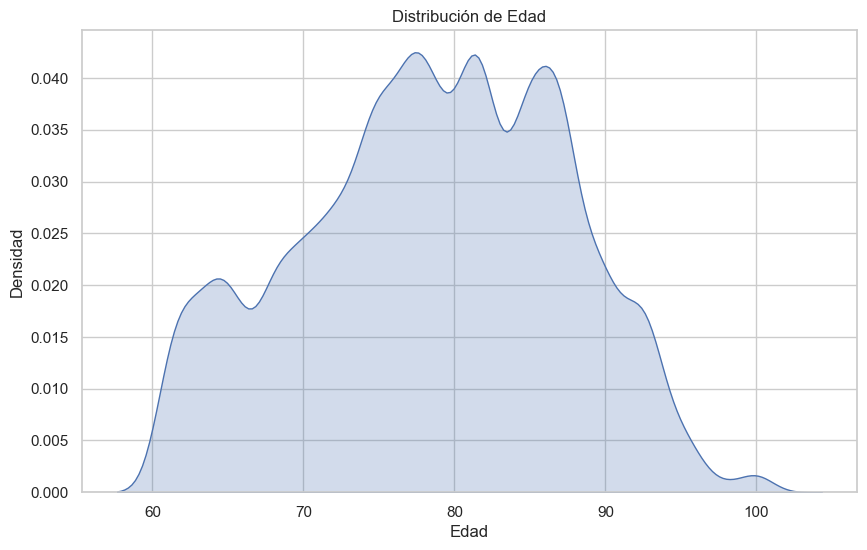

In [10]:
# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_final, x='EDAD_2', fill=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

Tiene una distribucion normal, donde su moda esta de los 75 años a 82 años

In [11]:
fig = px.bar(df_final['BARRIO'].value_counts().reset_index(), 
             y='index', 
             x='BARRIO', 
             orientation='h',
             labels={'index': 'BARRIO', 'BARRIO': 'Cantidad de Observaciones'},
             title='Cantidad de Observaciones por Barrio')

# Mostrar el diagrama de barras horizontal
fig.show()

Las personas que provienen de Manrique, y la Milagrosa, destacando que las personas mas propensas
a sufrir hipertension o diabetis provienen de alla

In [12]:
fig = px.bar(df_final['TRANSFUSION SANGRE'].value_counts().reset_index(), 
             y='index', 
             x='TRANSFUSION SANGRE', 
             orientation='h',
             labels={'index': 'TRANSFUSION SANGRE', 'TRANSFUSION SANGRE': 'Cantidad de Observaciones'},
             title='Cantidad de Observaciones para Transfusión de Sangre')

# Mostrar el diagrama de barras horizontal
fig.show()

Se debe elimar esta variable ya que hay una categoria con mas del 80% de los datos; no aportaria al modelo

In [15]:

fig = px.bar(df_final, x=df_final['VIA INGRESO'].value_counts().index, y=df_final['VIA INGRESO'].value_counts(),
             labels={'x': 'VIA INGRESO', 'y': 'Cantidad de observaciones'}, title="Distribución por VIA INGRESO")

# Mostrar el gráfico de barras
fig.show()

La mayoria de los pacientes ingresan por urgencias, seguido por remitidos y